In [120]:
# Importing my libraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [121]:
df = pd.read_csv('laptop_data2.csv')
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [122]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [123]:
df.shape

(1303, 12)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


#### Data Cleaning

In [125]:
# Removing irrelevant columns
df.drop(columns = "Unnamed: 0", inplace = True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [126]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [127]:
# Checking for missing values
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [128]:
# Checking for duplicates
df.duplicated().sum()

29

In [129]:
duplicates = df[df.duplicated()]
duplicates

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1274,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.3200
1275,Asus,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg,38841.1200
1276,Dell,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,24455.5200
1277,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,15397.9200
1278,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows 10,2.20kg,20193.1200
1279,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,47898.7200
1280,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,29303.4672
1281,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,42943.1472
1282,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,11135.5200
1283,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496


### Duplicates won't be dropped because they could be different laptops

In [130]:

df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

### checking for inconsistencies
* Checking datatype and changing datatype

In [131]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [132]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [133]:
df['Inches'].unique()

array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 13.5, 12.5, 13. ,
       18.4, 13.9, 12.3, 17. , 15. , 14.1, 11.3])

In [134]:
df['Inches'].dtype

dtype('float64')

In [135]:
df['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [136]:
df['ScreenResolution'].dtype

dtype('O')

In [137]:
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [138]:
df['Cpu'].dtype

dtype('O')

In [139]:
df['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [140]:
df['Ram'].dtype

dtype('O')

### To remove the string GB, Use .str.replace()

In [141]:
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Ram']

0        8
1        8
2        8
3       16
4        8
        ..
1298     4
1299    16
1300     2
1301     6
1302     4
Name: Ram, Length: 1303, dtype: object

### Changing the type from Object to float using astype

In [142]:
df['Ram']= df['Ram'].astype("float64")
df['Ram']

0        8.0
1        8.0
2        8.0
3       16.0
4        8.0
        ... 
1298     4.0
1299    16.0
1300     2.0
1301     6.0
1302     4.0
Name: Ram, Length: 1303, dtype: float64

In [143]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [144]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [145]:
df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [146]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [147]:
df['Weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

### To remove the string kg, Use .str.replace()

In [148]:
df['Weight'] = df['Weight'].str.replace('kg', '')
df['Weight']

0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1298     1.8
1299     1.3
1300     1.5
1301    2.19
1302     2.2
Name: Weight, Length: 1303, dtype: object

### To change the datatype to float

In [149]:
df['Weight']= df['Weight'].astype("float64")
df['Weight']

0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1298    1.80
1299    1.30
1300    1.50
1301    2.19
1302    2.20
Name: Weight, Length: 1303, dtype: float64

In [150]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [151]:
df['Price'].unique()

array([ 71378.6832,  47895.5232,  30636.    , 135195.336 ,  96095.808 ,
        21312.    , 114017.6016,  61735.536 ,  79653.6   ,  41025.6   ,
        20986.992 ,  18381.0672, 130001.6016,  26581.392 ,  67260.672 ,
        80908.344 ,  39693.6   , 152274.24  ,  26586.72  ,  52161.12  ,
        10224.432 ,  53226.72  ,  13746.24  ,  43636.32  ,  35111.52  ,
        22305.1392,  58554.72  ,  42624.    ,  69157.44  ,  47738.88  ,
        13053.0672,  10602.72  ,  23389.92  ,  99580.32  ,  53173.44  ,
        13266.72  ,  19553.76  ,  26037.4032,  46833.12  ,  20725.92  ,
        79866.72  ,  27864.9072,  36336.96  ,  75604.32  ,  19660.32  ,
        69210.72  ,  34045.92  ,  24828.48  ,  16996.32  ,  44808.48  ,
        21231.5472,  58767.84  ,  20459.52  ,  40908.384 ,  31232.2032,
       130482.72  ,  22111.2   ,  31914.72  ,  50136.48  ,  36763.2   ,
       105654.24  ,  23373.4032,  12201.12  ,  29250.72  ,  50562.72  ,
        58021.92  ,  50882.4   ,  46353.6   ,  58341.6   ,  2765

In [152]:
df['Price']

0        71378.6832
1        47895.5232
2        30636.0000
3       135195.3360
4        96095.8080
           ...     
1298     33992.6400
1299     79866.7200
1300     12201.1200
1301     40705.9200
1302     19660.3200
Name: Price, Length: 1303, dtype: float64

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   float64
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(4), object(7)
memory usage: 112.1+ KB


In [154]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

Text(0.5, 1.0, 'Price Distribution')

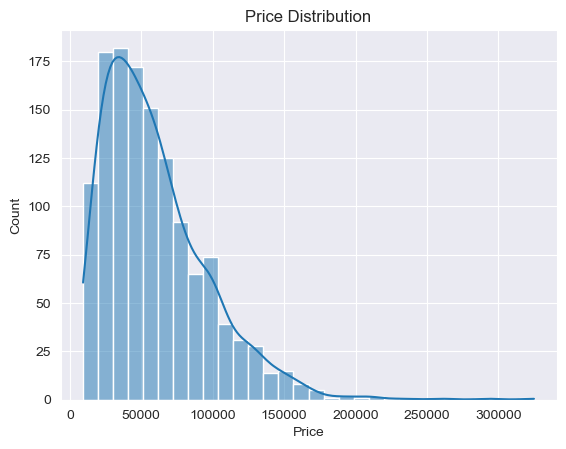

In [155]:
# Price Distrubution
sns.histplot(df['Price'], bins = 30, kde=True)
plt.title('Price Distribution')

In [156]:
df.groupby('Company')['TypeName'].count().reset_index()

,Company,TypeName
0,Acer,103
1,Apple,21
2,Asus,158
3,Chuwi,3
4,Dell,297
5,Fujitsu,3
6,Google,3
7,HP,274
8,Huawei,2
9,LG,3


### Checking the Number of Laptops by company

In [157]:
df.groupby('Company')['TypeName'].count().reset_index().rename(columns = {'TypeName': 'Count'})

,Company,Count
0,Acer,103
1,Apple,21
2,Asus,158
3,Chuwi,3
4,Dell,297
5,Fujitsu,3
6,Google,3
7,HP,274
8,Huawei,2
9,LG,3


### Renaming the Count Column and sorting it

In [158]:
count_by_company = df.groupby('Company')['TypeName'].count().reset_index().rename(columns = {'TypeName': 'Count'}).sort_values('Count', ascending = False)
count_by_company

,Company,Count
4,Dell,297
10,Lenovo,297
7,HP,274
2,Asus,158
0,Acer,103
11,MSI,54
16,Toshiba,48
1,Apple,21
15,Samsung,9
14,Razer,7


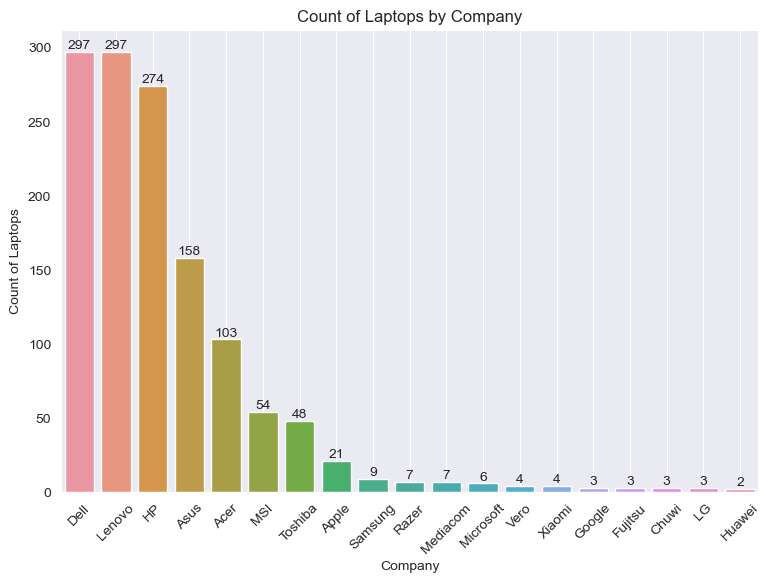

In [159]:
# visualizing the count_by_company
plt.figure(figsize=(9, 6))
ax= sns.barplot(data = count_by_company, x = 'Company', y = 'Count')
ax.bar_label(ax.containers[0], fontsize = 10)
plt.grid()
plt.xlabel('Company')
plt.ylabel('Count of Laptops')
plt.title('Count of Laptops by Company')
plt.xticks(rotation=45)

plt.show()

In [160]:
# Assignment
# Average Price of Laptop by Comapany- Plot the graph
# Count of Laptop by TypeName- Plot the graph
# Average Price by TypeName- Plot the graph

### Average Price of Laptop by Company

In [161]:
# Average Price of Laptop by Comapany- Plot the graphjj
df.groupby('Company')['Price'].mean().reset_index()

,Company,Price
0,Acer,33394.615969
1,Apple,83340.499886
2,Asus,58830.143878
3,Chuwi,16745.726400
4,Dell,63193.755782
5,Fujitsu,38841.120000
6,Google,89386.080000
7,HP,56891.044222
8,Huawei,75870.720000
9,LG,111834.720000


### Renaming the column to Average Price

In [162]:
df.groupby('Company')['Price'].mean().reset_index().rename(columns = {'Price': 'Average Price'})

,Company,Average Price
0,Acer,33394.615969
1,Apple,83340.499886
2,Asus,58830.143878
3,Chuwi,16745.726400
4,Dell,63193.755782
5,Fujitsu,38841.120000
6,Google,89386.080000
7,HP,56891.044222
8,Huawei,75870.720000
9,LG,111834.720000


In [163]:
avg_price_company = df.groupby('Company')['Price'].mean().reset_index().rename(columns = {'Price': 'Average Price'}).sort_values('Average Price', ascending = False)
avg_price_company

,Company,Average Price
14,Razer,178282.491429
9,LG,111834.720000
11,MSI,92116.226133
6,Google,89386.080000
13,Microsoft,85903.788000
1,Apple,83340.499886
8,Huawei,75870.720000
15,Samsung,75308.320000
16,Toshiba,67549.050000
4,Dell,63193.755782


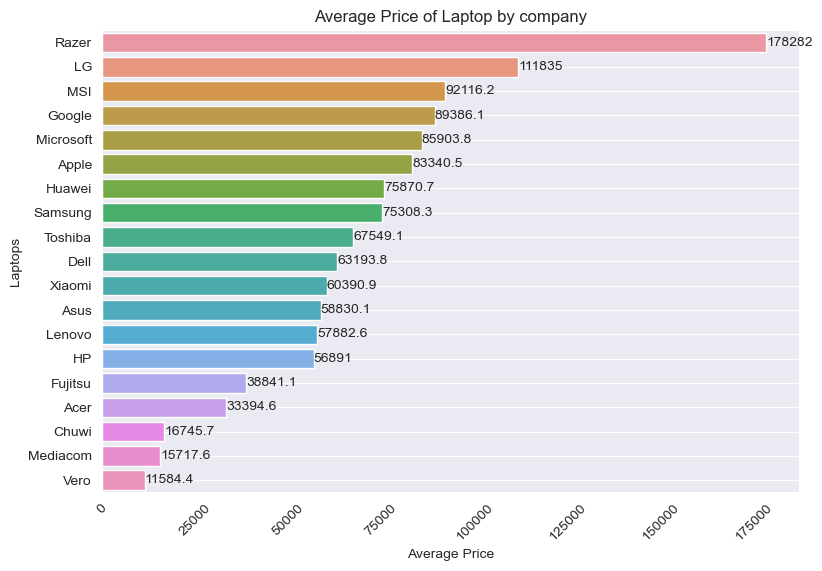

In [164]:
# visualizing the Average Price of Laptop by company
plt.figure(figsize=(9, 6))
ax= sns.barplot(data = avg_price_company, x = 'Average Price', y = 'Company')
ax.bar_label(ax.containers[0], fontsize = 10)
plt.grid()
plt.xlabel('Average Price')
plt.ylabel('Laptops')
plt.title('Average Price of Laptop by company')
plt.xticks(rotation=45)

plt.show()

### Count of Laptop by TypeName

In [165]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [166]:
count_by_TypeName = df.groupby('TypeName')['Company'].count().reset_index().rename(columns = {'Company': 'Count'}).sort_values('Count', ascending = False)
count_by_TypeName

,TypeName,Count
3,Notebook,727
1,Gaming,205
4,Ultrabook,196
0,2 in 1 Convertible,121
5,Workstation,29
2,Netbook,25


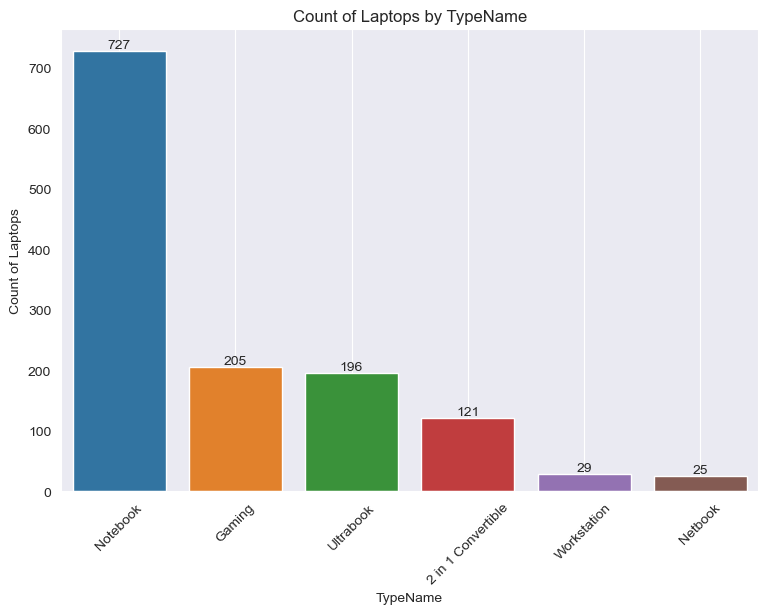

In [167]:
# visualizing the count_by_company
plt.figure(figsize=(9, 6))
ax= sns.barplot(data = count_by_TypeName, x = 'TypeName', y = 'Count')
ax.bar_label(ax.containers[0], fontsize = 10)
plt.grid()
plt.xlabel('TypeName')
plt.ylabel('Count of Laptops')
plt.title('Count of Laptops by TypeName')
plt.xticks(rotation=45)

plt.show()

### Average Price by TypeName

In [168]:
avg_price_TypeName = df.groupby('TypeName')['Price'].mean().reset_index().rename(columns = {'Price': 'Average Price'}).sort_values('Average Price', ascending = False)
avg_price_TypeName

,TypeName,Average Price
5,Workstation,121497.525683
1,Gaming,92247.960187
4,Ultrabook,82489.713429
0,2 in 1 Convertible,68326.360066
3,Notebook,41669.149113
2,Netbook,33898.440960


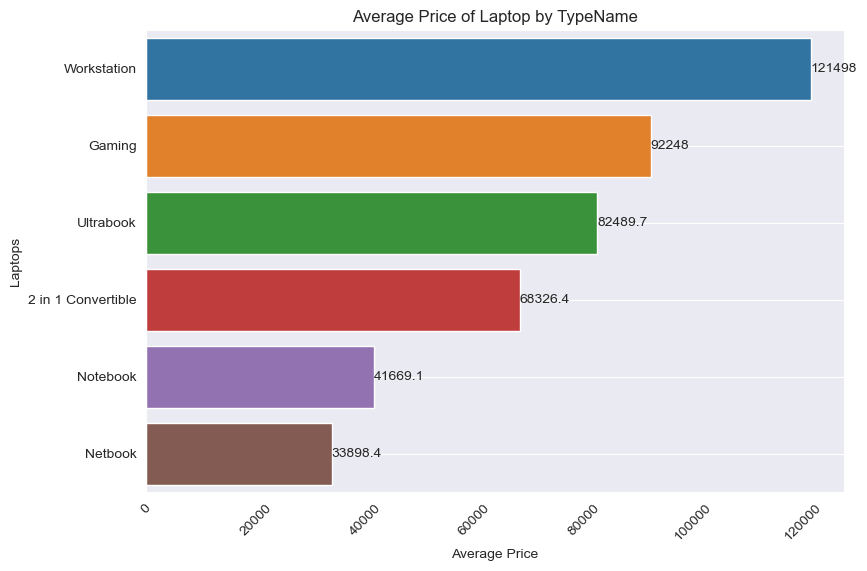

In [169]:
# visualizing the Average Price of Laptop by company
plt.figure(figsize=(9, 6))
ax= sns.barplot(data = avg_price_TypeName, x = 'Average Price', y = 'TypeName')
ax.bar_label(ax.containers[0], fontsize = 10)
plt.grid()
plt.xlabel('Average Price')
plt.ylabel('Laptops')
plt.title('Average Price of Laptop by TypeName')
plt.xticks(rotation=45)

plt.show()

### Univariant Analysis - exploring wach variable in a dataset seperately
* An example is the Price distribution plot

In [170]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16.0,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2.0,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6.0,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200


#### Distribution of Inches

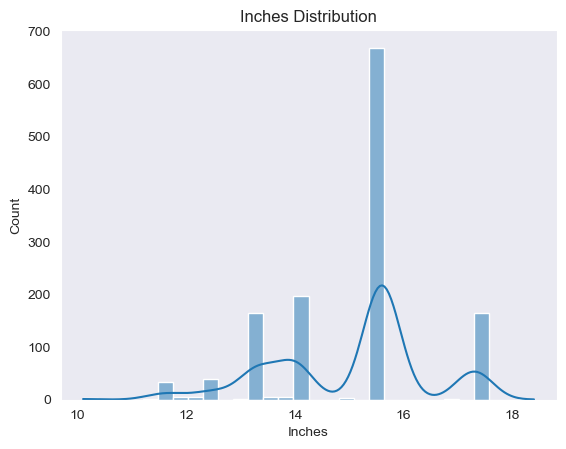

In [171]:
# Inches Distrubution
sns.histplot(df['Inches'], bins = 30, kde=True)
plt.title('Inches Distribution')
plt.grid()

#### Ram Distribution

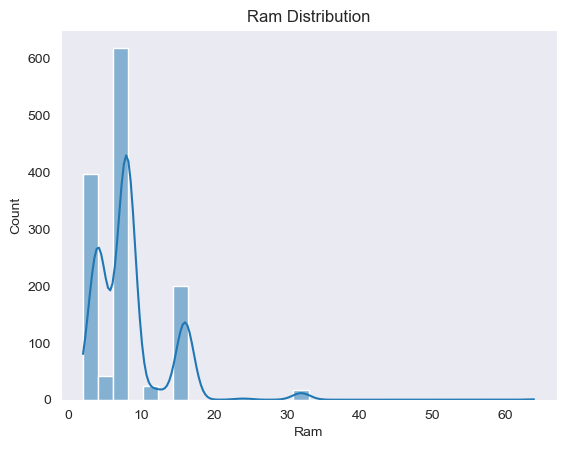

In [172]:
# Ram Distrubution
sns.histplot(df['Ram'], bins = 30, kde=True)
plt.title('Ram Distribution')
plt.grid()

### Relationship of Inches by Price using scatter plot
* A simple linear graph is a straight line graph that starts from zero
* So the above graph is simple saying there's no relationship between the Price and inches

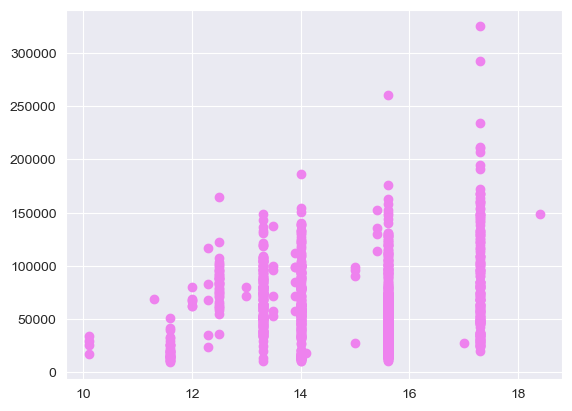

In [173]:
plt.scatter(df['Inches'],df['Price'], color = 'violet')
sns.set_style('darkgrid')
plt.show()

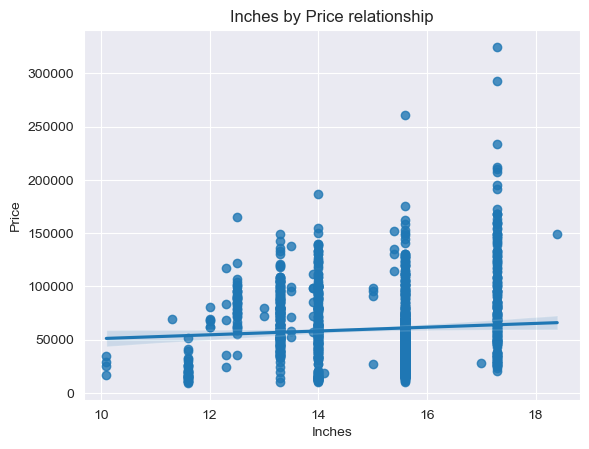

In [174]:
sns.regplot(data = df, x= 'Inches', y = 'Price') # regplot is used to show linear regression
sns.set_style('darkgrid')

plt.title("Inches by Price relationship")
plt.show()

### Weight and Price Relationship
* There is no relationship between this two

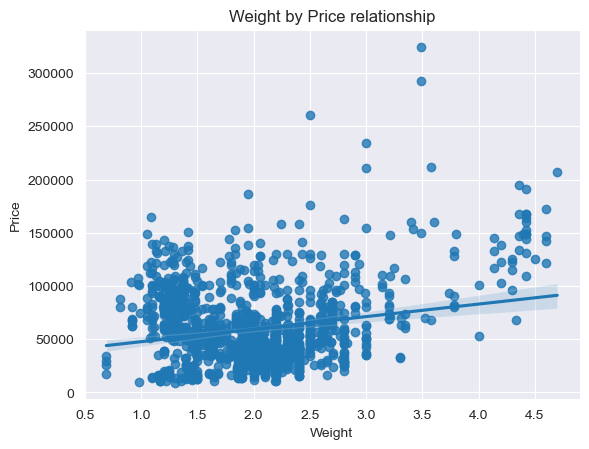

In [175]:
sns.regplot(data = df, x= 'Weight', y = 'Price') 
sns.set_style('darkgrid')

plt.title("Weight by Price relationship")
plt.show()

### Ram and Price Relationship
* According to the graph, there is a relationship between the price and Ram of the laptop
* As it can be seen as a Straight line linear graph starting from zero
* Which simply means, the higher the Ram, the higher the Price

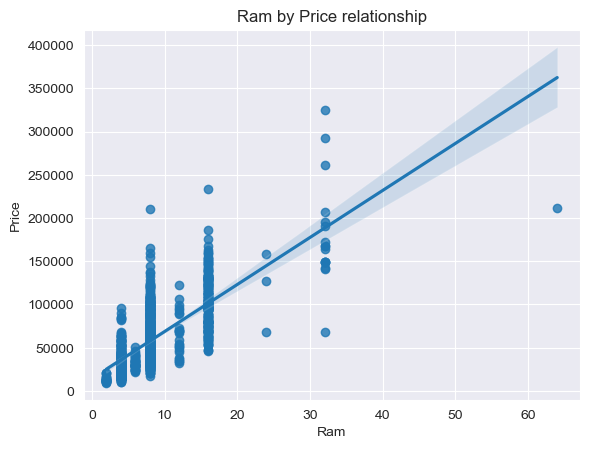

In [176]:
sns.regplot(data = df, x= 'Ram', y = 'Price')
sns.set_style('darkgrid')

plt.title("Ram by Price relationship")
plt.show()

#### Checking the Price Correlation with other Numeric Values

In [177]:
df.corr(numeric_only = True)['Price']


Inches    0.068197
Ram       0.743007
Weight    0.210370
Price     1.000000
Name: Price, dtype: float64

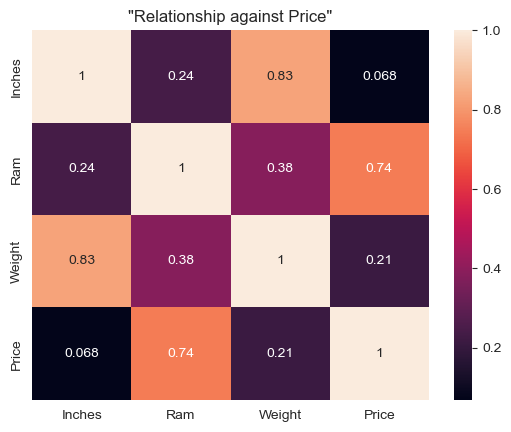

In [178]:
sns.heatmap(data = df.corr(numeric_only = True), annot = True)
sns.set_style('darkgrid')
plt.title('"Relationship against Price"')
plt.show()

## Feature Engineering
* Feature engineering is the process of selecting, manipulating and transforming raw data into features that can be used in supervised learning. 

#### Generating new features/column from your data
### It consists of five processes: 
- feature creation, 
- transformations, 
- feature extraction, 
- exploratory data analysis and 
- benchmarking.

In [179]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

### Creating a new column to check if there is touchscreen or not using 0's & 1's

In [180]:
def check_touch(x):
    if 'Touchscreen' in x:
        return 1
    else:
        return 0

In [181]:
df['Touchscreen'] = df['ScreenResolution'].apply(check_touch)

In [182]:
df['Touchscreen']

0       0
1       0
2       0
3       0
4       0
       ..
1298    1
1299    1
1300    0
1301    0
1302    0
Name: Touchscreen, Length: 1303, dtype: int64

In [183]:
df['Touchscreen'].value_counts()

Touchscreen
0    1111
1     192
Name: count, dtype: int64

In [184]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'Touchscreen'],
      dtype='object')

In [187]:
def check_ips(x):
    if 'IPS' in x:
        return 1
    else:
        return 0

In [188]:
df['IPS'] = df['ScreenResolution'].apply(check_ips)
df['IPS']

0       1
1       0
2       0
3       1
4       1
       ..
1298    1
1299    1
1300    0
1301    0
1302    0
Name: IPS, Length: 1303, dtype: int64

In [189]:
df['IPS'].value_counts()

IPS
0    938
1    365
Name: count, dtype: int64

In [190]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


### String split to seperate the numbers into height and width in the Screen Resolution column

### Or .str.extract can be used for a simpler method

In [191]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'Touchscreen', 'IPS'],
      dtype='object')

####  Extract height and width in one step

In [192]:
df[['Height', 'Width']] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)')
# (r'(\d+)x(\d+)') represent 2560 x 1600

#### Converting Width and Height to integers

In [196]:
df['Height'] = df['Height'].astype('int64')
df['Width'] = df['Width'].astype('int64')


df[['ScreenResolution', 'Height', 'Width']]

,ScreenResolution,Height,Width
0,IPS Panel Retina Display 2560x1600,2560,1600
1,1440x900,1440,900
2,Full HD 1920x1080,1920,1080
3,IPS Panel Retina Display 2880x1800,2880,1800
4,IPS Panel Retina Display 2560x1600,2560,1600
...,...,...,...
1298,IPS Panel Full HD / Touchscreen 1920x1080,1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200x1800,3200,1800
1300,1366x768,1366,768
1301,1366x768,1366,768


In [197]:
df['Height'].dtype

dtype('int64')

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   float64
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  Height            1303 non-null   int64  
 14  Width             1303 non-null   int64  
dtypes: float64(4), int64(4), object(7)
memory usage: 152.8+ KB
